In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud

In [2]:
df = pd.read_csv('./UScomments.csv', error_bad_lines=False)
df

C:\Users\my pc\AppData\Local\Temp\ipykernel_7104\3188686947.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('./UScomments.csv', error_bad_lines=False)
Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\my pc\AppData\Local\Temp\ipykernel_7104\3188686947.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./UScomments.csv', error_bad_lines=False)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
...,...,...,...,...
691395,EoejGgUNmVU,Лучшая,1,0
691396,EoejGgUNmVU,qu'est ce que j'aimerais que tu viennes à Roan...,0,0
691397,EoejGgUNmVU,Ven a mexico! 😍 te amo LP,0,0
691398,EoejGgUNmVU,Islığı yeter...,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691375 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [4]:
df['comment_text'].fillna('', inplace=True)


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478707 entries, 0 to 691398
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      478707 non-null  object
 1   comment_text  478707 non-null  object
 2   likes         478707 non-null  object
 3   replies       478707 non-null  object
dtypes: object(4)
memory usage: 18.3+ MB


In [7]:
for col in ['likes', 'replies']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478707 entries, 0 to 691398
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      478707 non-null  object
 1   comment_text  478707 non-null  object
 2   likes         478707 non-null  int32 
 3   replies       478707 non-null  int32 
dtypes: int32(2), object(2)
memory usage: 14.6+ MB


In [8]:
# Group by video_id to get total likes and replies per video
video_stats = df.groupby('video_id').agg({
    'likes': 'sum',
    'replies': 'sum'
}).reset_index()

# Sort by likes to find the top liked videos
top_liked_videos = video_stats.sort_values(by='likes', ascending=False).head(10)
print(top_liked_videos)
print("\n\n\n")

# Sort by replies to find the top commented videos
top_commented_videos = video_stats.sort_values(by='replies', ascending=False).head(10)
print(top_commented_videos)


         video_id   likes  replies
49    0R7MQwmbiQc  181555     2016
1619  hkA2a4_tNOs  165042     2934
795   LBLGo2y_BBU  131723     1751
911   OZAfse9Pb4c   95591     3028
37    03jeumSTSzc   91878     2515
36    03IUgOd4GH4   82371     2327
116   2WIzsHMcSp4   79326     1151
1168  WHvT-oGf6ik   78270     1500
334   8ZRCdfaAIy0   74442     2505
81    1NyMSWqIJDQ   69664     2522




         video_id   likes  replies
911   OZAfse9Pb4c   95591     3028
1619  hkA2a4_tNOs  165042     2934
1822  nivfxoep6Rs   51788     2875
1419  bu9e410C__I   29849     2673
635   GyxgtAwn34A   38331     2641
1114  UXdbCReBTR8   31631     2595
81    1NyMSWqIJDQ   69664     2522
1425  byA77xkQBEE   34956     2517
37    03jeumSTSzc   91878     2515
1866  oqmSuPJfvJo   54605     2515


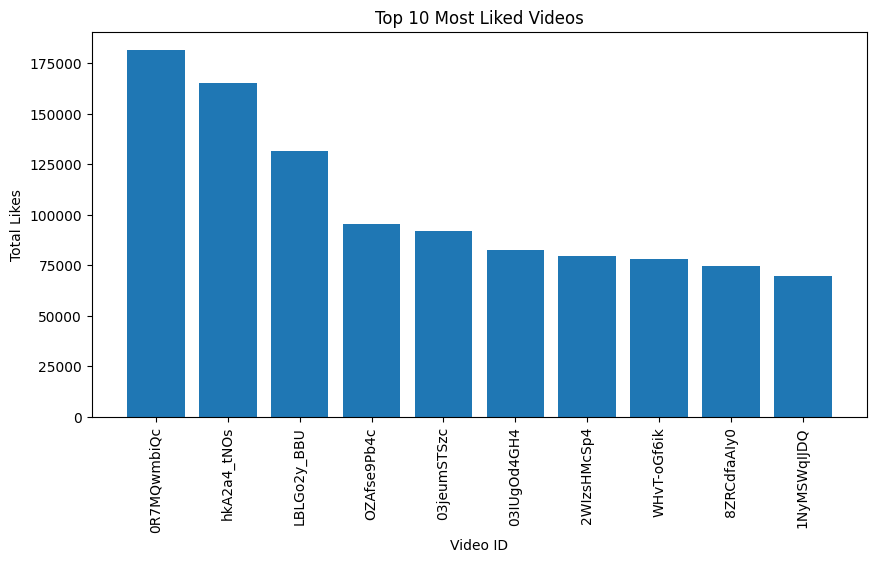

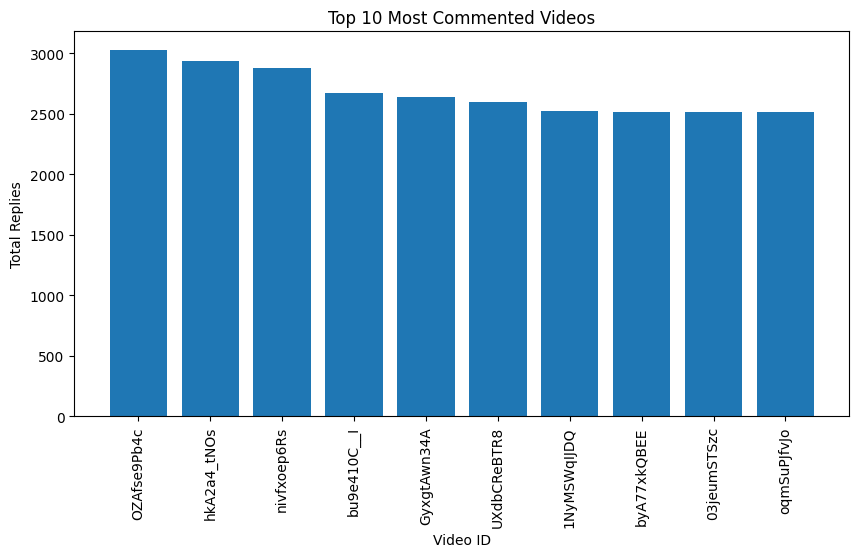

In [9]:
import matplotlib.pyplot as plt

# Plot top liked videos
plt.figure(figsize=(10, 5))
plt.bar(top_liked_videos['video_id'], top_liked_videos['likes'])
plt.xlabel('Video ID')
plt.ylabel('Total Likes')
plt.title('Top 10 Most Liked Videos')
plt.xticks(rotation=90)
plt.show()

# Plot top commented videos
plt.figure(figsize=(10, 5))
plt.bar(top_commented_videos['video_id'], top_commented_videos['replies'])
plt.xlabel('Video ID')
plt.ylabel('Total Replies')
plt.title('Top 10 Most Commented Videos')
plt.xticks(rotation=90)
plt.show()


In [10]:
# Correlation between likes and replies
correlation = video_stats['likes'].corr(video_stats['replies'])
print(f"Correlation between likes and replies: {correlation}")


Correlation between likes and replies: 0.716708708123207
